# IBM - Applied Data Science Capstone - The battle of neighbourhoods

## Introduction

New York City represents one of the most attractive cities of the United States of America and of the world. Indeed, it offers an extremely wide range of business opportunities: from finance and real estate to digital marketing, tourism, art and fashion, this city attracts talents from all over the world. However, the competition among all these ambitious talents is very high and developing a successful business can be very hard and risky. As a consequence, any plan aimed at starting a new business in the city should be analysed by taking into consideration not only the idea behind it, but also the competitive landscape. This analysis aims at clarifying the business environment that New York City represents, with the final goal of providing applicable insights for new entrepreneurs, to successfully confront themselves with this market and start a profitable business.


The new business in analysis is represented by a successful Indian restaurant, named " The Elephant", trying to expand in North America and open a new restaurant in New York City and aims at becoming a point of reference for its unique offer in the heterogeneous mix of cuisines located in New York City. The culture of food and the industry behind it in New York City mainly involves:

North American cuisine
Asian cuisine (Japanese, Indian, Chinese and Tibetan)
Middle Eastern cuisine
European cuisine (Italian, French and Spanish)
Ecommerce-based American food providers

This wide mix of choices makes it very hard for a new restaurant to emerge and stay profitable. One of the first choices to be made, that will also have a big impact on the success of the business, is its location. The choice of the location depends on several variables:

population density of the areas;
Asian ethnic minority population size of the areas;
distance from top rated Indian restaurants located in the area.


The objective of this analysis will be to help “The Elephant” choosing the best New York City’s spot for the business to start and remain profitable in the long run. Our team of data scientists will analyze data relative to the previously cited characteristics of the neighbourhoods, to identify the optimal geographical location for this new business. Therefore, the resulting insights will be also useful for any entrepreneur interested in starting a new Indian restaurant in the city.

## Data description

The focus of this analysis is New York City. The final goal is to recommend our client the best choice in terms of NYC's neighbourhoods to start a restaurant. The data embedded in the analysis are listed below. More sepcifically, our data science team will provide data and insight to:

Part 1: NYC Population & Demographic characteristics

Data source:https://en.wikipedia.org/wiki/New_York_City ; https://en.wikipedia.org/wiki/Demographics_of_New_York_City. 

Web scraping techniques to get New York City's population density and demographics data from Wikipedia. Preliminary finding indicates that Queens is the second most populous urban area in New York City (NYC), behind Brooklyn; and the most ethnically diverse urban area in New York City with the highest Asian ethnic minority population.

Part 2: NYC Competitors landscape

Data source:https://cocl.us/new_york_dataset and Foursquare API. 

These data have been used to explore various neighbourhoods and each Indian restaurants venues in the neighbourhood.

## Methodology (& detailed outputs)


- Part 1: NYC Population & Demographic characteristics

- Part 2: NYC Competitors landscape


### PART 1 NYC population and demographics characteristics

Data source: https://en.wikipedia.org/wiki/New_York_City ; https://en.wikipedia.org/wiki/Demographics_of_New_York_City. 

Web scraping techniques to get New York City's population density and demographics data from Wikipedia. Goal: recommend our client which neighbourhood in New York City is the best choice to start a restaurant. 

In [66]:
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#!conda install -c conda-forge folium

import os
import folium # map rendering library
# Matplotlib and associated plotting modules

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mp
import re
import csv
%matplotlib inline

print('Done')

Done


In [67]:
response_obj = requests.get('https://en.wikipedia.org/wiki/New_York_City').text
soup = BeautifulSoup(response_obj,'lxml')
Neighborhoods_NYC_Table = soup.find('table', {'class':'wikitable sortable'})

In [68]:
rows = Neighborhoods_NYC_Table.select("tbody > tr")[3:8]

boroughs = []
for row in rows:
    borough = {}
    tds = row.select('td')
    borough["borough"] = tds[0].text.strip()
    borough["county"] = tds[1].text.strip()
    borough["population"] = float(tds[2].text.strip().replace(",",""))
    borough["gdp_billions"] = float(tds[3].text.strip().replace(",",""))
    borough["gdp_per_capita"] = float(tds[4].text.strip().replace(",",""))
    borough["land_sqm"] = float(tds[5].text.strip().replace(",",""))
    borough["land_sqkm"] = float(tds[6].text.strip().replace(",",""))
    borough["persons_sqm"] = float(tds[7].text.strip().replace(",",""))
    borough["persons_sqkm"] = float(tds[8].text.strip().replace(",",""))
    
    boroughs.append(borough)

print(boroughs)

[{'borough': 'The Bronx', 'county': 'Bronx', 'population': 1432132.0, 'gdp_billions': 42.695, 'gdp_per_capita': 29200.0, 'land_sqm': 42.1, 'land_sqkm': 109.04, 'persons_sqm': 34653.0, 'persons_sqkm': 13231.0}, {'borough': 'Brooklyn', 'county': 'Kings', 'population': 2582830.0, 'gdp_billions': 91.559, 'gdp_per_capita': 34600.0, 'land_sqm': 70.82, 'land_sqkm': 183.42, 'persons_sqm': 37137.0, 'persons_sqkm': 14649.0}, {'borough': 'Manhattan', 'county': 'New York', 'population': 1628701.0, 'gdp_billions': 600.244, 'gdp_per_capita': 360900.0, 'land_sqm': 22.83, 'land_sqkm': 59.13, 'persons_sqm': 72033.0, 'persons_sqkm': 27826.0}, {'borough': 'Queens', 'county': 'Queens', 'population': 2278906.0, 'gdp_billions': 93.31, 'gdp_per_capita': 39600.0, 'land_sqm': 108.53, 'land_sqkm': 281.09, 'persons_sqm': 21460.0, 'persons_sqkm': 8354.0}, {'borough': 'Staten Island', 'county': 'Richmond', 'population': 476179.0, 'gdp_billions': 14.514, 'gdp_per_capita': 30300.0, 'land_sqm': 58.37, 'land_sqkm': 15

In [69]:
response_obj = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soup = BeautifulSoup(response_obj,'lxml')
Population_Census_Table = soup.select_one('.wikitable:nth-of-type(5)') #use css selector to target correct table.

jurisdictions = []
rows = Population_Census_Table.select("tbody > tr")[3:8]
for row in rows:
    jurisdiction = {}
    tds = row.select('td')
    jurisdiction["jurisdiction"] = tds[0].text.strip()
    jurisdiction["population_census"] = tds[1].text.strip()
    jurisdiction["%_white"] = float(tds[2].text.strip().replace(",",""))
    jurisdiction["%_black_or_african_amercian"] = float(tds[3].text.strip().replace(",",""))
    jurisdiction["%_Asian"] = float(tds[4].text.strip().replace(",",""))
    jurisdiction["%_other"] = float(tds[5].text.strip().replace(",",""))
    jurisdiction["%_mixed_race"] = float(tds[6].text.strip().replace(",",""))
    jurisdiction["%_hispanic_latino_of_other_race"] = float(tds[7].text.strip().replace(",",""))
    jurisdiction["%_catholic"] = float(tds[10].text.strip().replace(",",""))
    jurisdiction["%_jewish"] = float(tds[12].text.strip().replace(",",""))
    jurisdictions.append(jurisdiction)

print(jurisdictions)

[{'jurisdiction': 'Queens', 'population_census': '2,229,379', '%_white': 44.1, '%_black_or_african_amercian': 20.0, '%_Asian': 17.6, '%_other': 12.3, '%_mixed_race': 6.1, '%_hispanic_latino_of_other_race': 25.0, '%_catholic': 37.0, '%_jewish': 5.0}, {'jurisdiction': 'Manhattan', 'population_census': '1,537,195', '%_white': 54.4, '%_black_or_african_amercian': 17.4, '%_Asian': 9.4, '%_other': 14.7, '%_mixed_race': 4.1, '%_hispanic_latino_of_other_race': 27.2, '%_catholic': 11.0, '%_jewish': 9.0}, {'jurisdiction': 'Bronx', 'population_census': '1,332,650', '%_white': 29.9, '%_black_or_african_amercian': 35.6, '%_Asian': 3.0, '%_other': 25.7, '%_mixed_race': 5.8, '%_hispanic_latino_of_other_race': 48.4, '%_catholic': 14.0, '%_jewish': 5.0}, {'jurisdiction': 'Staten Island', 'population_census': '443,728', '%_white': 77.6, '%_black_or_african_amercian': 9.7, '%_Asian': 5.7, '%_other': 4.3, '%_mixed_race': 2.7, '%_hispanic_latino_of_other_race': 12.1, '%_catholic': 11.0, '%_jewish': 5.0}, {

In [70]:
df = pd.DataFrame(jurisdictions, columns=["jurisdiction","%_white", "%_black_or_african_amercian", "%_Asian", "%_other", "%_mixed_race", "%_hispanic_latino_of_other_race"])
df.head()

,jurisdiction,%_white,%_black_or_african_amercian,%_Asian,%_other,%_mixed_race,%_hispanic_latino_of_other_race
0,Queens,44.1,20.0,17.6,12.3,6.1,25.0
1,Manhattan,54.4,17.4,9.4,14.7,4.1,27.2
2,Bronx,29.9,35.6,3.0,25.7,5.8,48.4
3,Staten Island,77.6,9.7,5.7,4.3,2.7,12.1
4,NYC Total,44.7,26.6,9.8,14.0,4.9,27.0


According to these preliminary finding, Queens is the second most populous urban area in New York City (NYC), behind Brooklyn. Moreover, it's the most ethnically diverse urban area in New York City, with the highest Asian ethnic minority population.

### PART 2: Competitors landscape

Data source: https://cocl.us/new_york_dataset and Foursquare API. 

These data have been used to explore various neighbourhoods and each Indian restaurants venues in the neighbourhood.

In [71]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim # convert address into latitude and longitude values
!conda install -c conda-forge folium

import os
import folium # map rendering library

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mp
import re
import csv
%matplotlib inline


print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


We gathered the neighbourhoods using FourSquare API & New York City data, which contains a list of boroughs and neighbourhoods, along with their latitude and longitude.

In [4]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    locatidn = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

Define a function to interact with FourSquare API and get top 100 venues within a radius of 1000 metres for a given latitude and longitude.

In [5]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = '4LBB0F3IG1A1EVML1YNORAVGXTQZTUQE4W4JFEM4J4S1ZJ0X'# Foursquare ID, note there is a daily call quota limit 
    CLIENT_SECRET ='BHQEOOM1QWTUYHUJQL25UOHO14LSFXKBTS01NLYWYJD00ULR' # Foursquare Secret, note there is a daily call quota it
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Define a function to get venue details (e.g. count, rating, tip counts for a given venue id), to be used for ranking.

In [6]:
def get_venue_details(venue_id):
        
    CLIENT_ID = '4LBB0F3IG1A1EVML1YNORAVGXTQZTUQE4W4JFEM4J4S1ZJ0X'# Foursquare ID, note there is a daily call quota limit 
    CLIENT_SECRET ='BHQEOOM1QWTUYHUJQL25UOHO14LSFXKBTS01NLYWYJD00ULR' # Foursquare Secret, note there is a daily call quota it it
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Define a funtion to get NYC data such as boroughs, neighborhoods and their latitude and longitude.

In [7]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [8]:
# get new york data
new_york_data=get_new_york_data()

In [9]:
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [10]:
new_york_data.shape

(306, 4)

Based on the above output, we can see that there are 306 different neighborhoods in New York City.

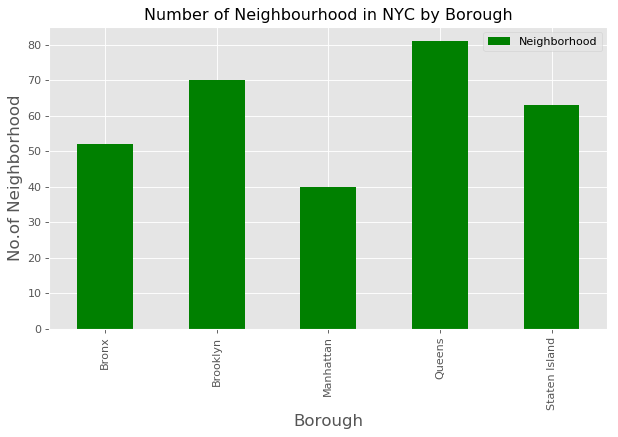

In [12]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 80)
# title
plt.title('Number of Neighbourhood in NYC by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar', color = 'green')
#legend
plt.legend()
plt.show()

As displayed above, Queens is the most densely populated borough in New York City with a total of 80 neighborhoods.

In [13]:
# prepare neighborhood list that contains indian restaurant
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(new_york_data),')','Indian Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Indian Resturants in Wakefield, Bronx:0
( 2 / 306 ) Indian Resturants in Co-op City, Bronx:0
( 3 / 306 ) Indian Resturants in Eastchester, Bronx:0
( 4 / 306 ) Indian Resturants in Fieldston, Bronx:0
( 5 / 306 ) Indian Resturants in Riverdale, Bronx:0
( 6 / 306 ) Indian Resturants in Kingsbridge, Bronx:0
( 7 / 306 ) Indian Resturants in Marble Hill, Manhattan:0
( 8 / 306 ) Indian Resturants in Woodlawn, Bronx:1
( 9 / 306 ) Indian Resturants in Norwood, Bronx:0
( 10 / 306 ) Indian Resturants in Williamsbridge, Bronx:0
( 11 / 306 ) Indian Resturants in Baychester, Bronx:0
( 12 / 306 ) Indian Resturants in Pelham Parkway, Bronx:0
( 13 / 306 ) Indian Resturants in City Island, Bronx:0
( 14 / 306 ) Indian Resturants in Bedford Park, Bronx:0
( 15 / 306 ) Indian Resturants in University Heights, Bronx:0
( 16 / 306 ) Indian Resturants in Morris Heights, Bronx:0
( 17 / 306 ) Indian Resturants in Fordham, Bronx:0
( 18 / 306 ) Indian Resturants in East Tremont, Bronx:0
( 19 / 306 ) Ind

In [14]:
indian_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot
1,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill
2,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine
3,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird
4,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill


In [15]:
indian_rest_ny.shape

(140, 4)

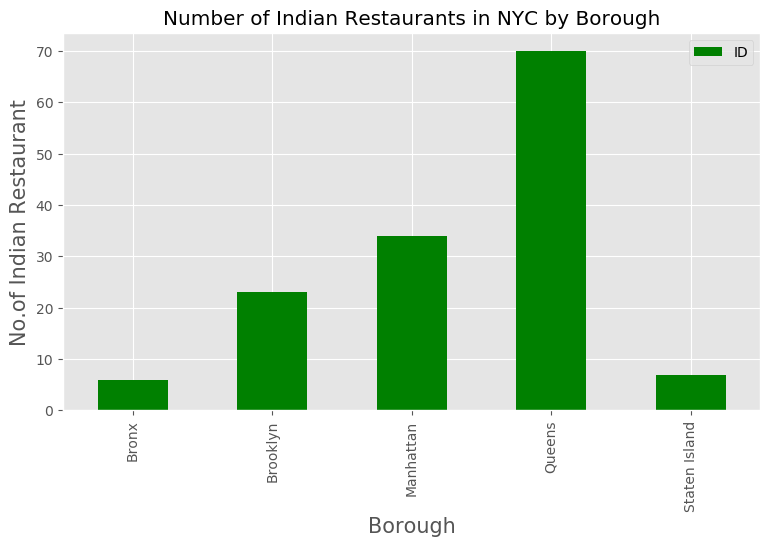

In [17]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Restaurants in NYC by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Restaurant', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar', color='green')
#legend
plt.legend()
#displays the plot
plt.show()

Moreover, we can see that Queens has the highest number of Indian Restaurants.

In [18]:
indian_rest_ny[indian_rest_ny['Neighborhood']=='Floral Park']

,Borough,Neighborhood,ID,Name
97,Queens,Floral Park,527ffc0811d2d329d5e49abd,Jackson Diner
98,Queens,Floral Park,4e4e3e22bd4101d0d7a5c2d1,Kerala Kitchen
99,Queens,Floral Park,4b647b56f964a520c4b62ae3,Usha Foods & Usha Sweets
100,Queens,Floral Park,4b787c49f964a5209cd12ee3,Santoor Indian Restaurant
101,Queens,Floral Park,4c0c01e0bbc676b00d6b4cd5,Mumbai Xpress
102,Queens,Floral Park,4c76ff35a5676dcb72671721,Flavor Of India
103,Queens,Floral Park,4df0f39dd4c04d0392c853ea,Sagar Chinese
104,Queens,Floral Park,4ec1b54f4690d2338a359d66,Tabaq Kebab Grill
105,Queens,Floral Park,4e6bfe1c7d8b2c711b17bbe5,Surya sweets and snacks


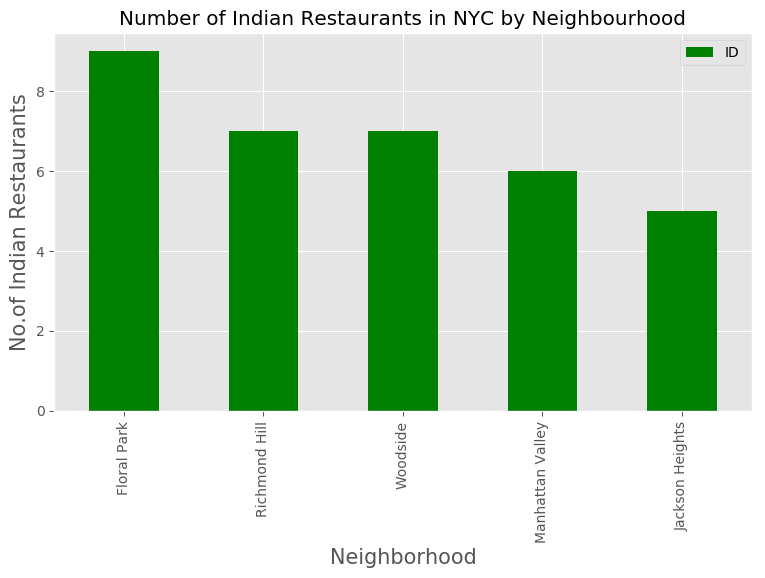

In [20]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Restaurants in NYC by Neighbourhood')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Restaurants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar', color ='green')
#legend
plt.legend()
#displays the plot
plt.show()

As a remark, we also pointed out that Floral Park in Queens is characterized by the majority of Indian restaurants, with a total count of 11.

In [21]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row

    # prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except (IndexError, KeyError) as e:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID        Name  Likes  Rating  Tips
0  4c0448d9310fc9b6bf1dc761  Curry Spot      5     8.0    10
( 1 / 140 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4c194631838020a13e78e561  Melanies Roti Bar And Grill      3     6.3     2
( 2 / 140 ) processed
                         ID                  Name  Likes  Rating  Tips
0  4c04544df423a593ac83d116  Cumin Indian Cuisine     13     5.9     9
( 3 / 140 ) processed
                         ID         Name  Likes  Rating  Tips
0  551b7f75498e86c00a0ed2e1  Hungry Bird      8     6.7     3
( 4 / 140 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4c194631838020a13e78e561  Melanies Roti Bar And Grill      3     6.3     2
( 5 / 140 ) processed
                         ID       Name  Likes  Rating  Tips
0  4b5a4dc8f964a520a2bb28e3  Taj Mahal     38     8.3    26
( 6 / 140 ) processed
                         ID          Name  Likes

In [22]:
indian_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,8.0,10
1,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,6.3,2
2,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,5.9,9
3,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird,8,6.7,3
4,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,6.3,2


In [25]:
indian_rest_stats_ny.shape

(140, 7)

In [26]:
indian_rest_ny.shape

(140, 4)

In [27]:
indian_rest_stats_ny.to_csv('indian_rest_stats_ny.csv', index=False)

In [28]:
indian_rest_stats_ny_csv=pd.read_csv('indian_rest_stats_ny.csv')

In [29]:
indian_rest_stats_ny_csv.shape

(140, 7)

In [30]:
indian_rest_stats_ny_csv.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,8.0,10
1,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,6.3,2
2,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,5.9,9
3,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird,8,6.7,3
4,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,6.3,2


In [31]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
Borough         140 non-null object
Neighborhood    140 non-null object
ID              140 non-null object
Name            140 non-null object
Likes           140 non-null object
Rating          140 non-null float64
Tips            140 non-null object
dtypes: float64(1), object(6)
memory usage: 7.7+ KB


In [33]:
indian_rest_stats_ny['Likes']=indian_rest_stats_ny['Likes'].astype('float64')

In [34]:
indian_rest_stats_ny['Tips']=indian_rest_stats_ny['Tips'].astype('float64')

In [35]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
Borough         140 non-null object
Neighborhood    140 non-null object
ID              140 non-null object
Name            140 non-null object
Likes           140 non-null float64
Rating          140 non-null float64
Tips            140 non-null float64
dtypes: float64(3), object(4)
memory usage: 7.7+ KB


In [36]:
# Restaurants with maximum Likes
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                590
Rating                               9.1
Tips                                 148
Name: 38, dtype: object

In [37]:
# Restaurants with maximum Rating
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                590
Rating                               9.1
Tips                                 148
Name: 38, dtype: object

In [38]:
# Restaurants with maximum Tips
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                    Gramercy
ID              4a12eb1ff964a52099771fe3
Name                               Dhaba
Likes                                497
Rating                               8.4
Tips                                 164
Name: 48, dtype: object

In [39]:
ny_neighborhood_stats=indian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [40]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
0,Astoria,9.1
66,Tribeca,9.1
43,Murray Hill,8.8
13,Clinton Hill,8.7
24,Fort Greene,8.7
28,Gramercy,8.6
19,East Village,8.6
59,South Side,8.5
46,North Side,8.5
57,Roosevelt Island,8.4


In [41]:
ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [42]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
1,Brooklyn,6.443478
2,Manhattan,5.888235
0,Bronx,5.533333
3,Queens,0.130000
4,Staten Island,0.000000


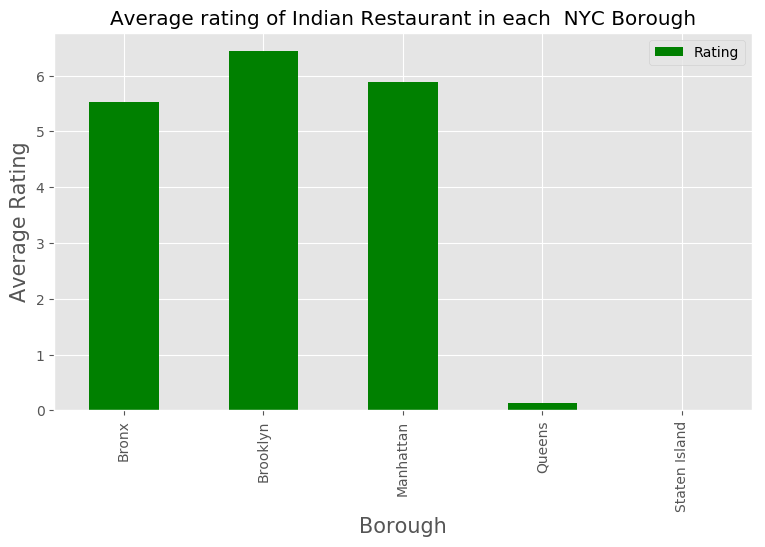

In [44]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Indian Restaurant in each  NYC Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
indian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color ='green')
#legend
plt.legend()
#displays the plot
plt.show()

As displayed in the output, Brooklyn has the highest average rating for Indian Restaurants.

All the neighborhoods with average rating greater or equal 8.0 to be visualized on map.

In [45]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]

In [46]:
ny_neighborhood_stats

,Neighborhood,Average Rating
0,Astoria,9.10
1,Bay Ridge,8.30
11,Central Harlem,8.10
13,Clinton Hill,8.70
17,East Flatbush,8.10
19,East Village,8.60
24,Fort Greene,8.70
28,Gramercy,8.60
42,Morningside Heights,8.00
43,Murray Hill,8.80


In [47]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,new_york_data, on='Neighborhood')

In [48]:
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [49]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Queens,Astoria,40.768509,-73.915654,9.1
15,Manhattan,Tribeca,40.721522,-74.010683,9.1
10,Queens,Murray Hill,40.764126,-73.812763,8.8
9,Manhattan,Murray Hill,40.748303,-73.978332,8.8
6,Brooklyn,Fort Greene,40.688527,-73.972906,8.7
3,Brooklyn,Clinton Hill,40.693229,-73.967843,8.7
5,Manhattan,East Village,40.727847,-73.982226,8.6
7,Manhattan,Gramercy,40.737210,-73.981376,8.6
11,Brooklyn,North Side,40.714823,-73.958809,8.5
14,Brooklyn,South Side,40.710861,-73.958001,8.5


In [50]:
# create map and display it
ny_map = folium.Map(location=(40.693943, -73.985880), zoom_start=12)

In [51]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [52]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

Best neighbourhoods in New York that has highest average rating for Indian Restaurants.

In [74]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

As we can see:
- Murray Hill, Tribeca, Midtown in Manhattan are some of the best neighborhoods for Indian cuisine.
- Bronx has the lowest rated Indian Resturants in NYC.
- Manhattan is the best place to stay if you prefer Indian Cuisine.

## Results (summary)

We ran a preliminary analysis, according to which Queens is the second most populous urban area in New York City (NYC), behind Brooklyn; moreover, it's the most ethnically diverse urban area in New York City, with the highest Asian ethnic minority population.

We then analyzed the data more in deep and we realized tha there are 306 different neighborhoods in New York City, with the following highlighted characteristics:

- Queens is the most densely populated borough in New York City with 80 neighborhoods
- Moreover, Queens has the highest number of Indian restaurants.
- Floral Park in Queens has the most Indian resturants with (11 in total).
- Brooklyn has the highest average rating of Indian restaurants.

Finally, we visualized on a map all the neighborhoods with average rating greater or equal 8.0, to visually check what are the best neighbourhoods in New York that has highest average rating for Indian Restaurants, with the following highlights:

- Murray Hill, Tribeca, Midtown in Manhattan are some of the best neighborhoods for Indian cuisine.
- Bronx has the lowest rated Indian resturants in NYC.
- Manhattan is the best place to locate for people who prefer Indian Cuisine.

## Discussion (highlights by area)

Queens: area with highest density of population borough in New York City (i.e., 80 neighborhoods), with the highest number of Indian restaurants (11 in total only in Floral Park).

Brooklyn: area with the highest average rating of Indian Restaurants.

Bronx: area with the lowest rated Indian Resturants in NYC.

Manhattan: Murray Hill, Tribeca, Midtown are the best Manhattan's neighborhoods for Indian cuisine.

> Manhattan is the best place for people who prefer Indian Cuisine.

## Conclusion

Based on all these results, we recommend Midtown in Manhattan as the best location in NYC for "The Elephant", considering that it represents:

- the third most populous urban area in New York City (NYC).
- an area with population density of 27,826 people per square km, highest of any borough in the United States.
- an area with some of the top rated Indian restaurants and thus an existing customer base and interest toward this cuisine.
- an aera with the second highest Asian ethnic minority population in NYC.